<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    68.854520  58.707153  61.211187   -8.415272  190.357588   
      1.0    57.329540  88.266135  33.974483  -53.743408  135.826750   
      2.0    45.215694  22.043105  89.071799   52.896220  219.226818   
      3.0    69.375325  71.150993  24.742899   95.261129  270.530346   
      4.0    87.837297  47.725671  65.999025  -77.886749  133.675243   
...                ...        ...        ...         ...         ...   
999.0 245.0  22.462586  64.986534  22.662754   75.723951  195.835826   
      246.0  65.758199  97.986011  91.293587 -285.817199  -20.779404   
      247.0  43.850566  82.988350  93.879229  205.037555  435.755700   
      248.0  44.150395  26.941848  96.556657  -12.842808  164.806093   
      249.0  88.062161  23.980807  27.737661  -83.902685   65.877945   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    190.762309   -0.404722  
      1.0    176.665883  -40.839132  
      2.0    175.674400   43.552418  
      3.0    169.774367  100.755979  
      4.0    202.818461  -69.143219  
...                 ...         ...  
999.0 245.0  101.089723   94.746103  
      246.0  229.435928 -250.215331  
      247.0  184.823842  250.931859  
      248.0  148.372816   16.433277  
      249.0  182.526169 -116.648224  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    68.854520  58.707153  61.211187   -8.415272  190.357588   
      1.0    57.329540  88.266135  33.974483  -53.743408  135.826750   
      2.0    45.215694  22.043105  89.071799   52.896220  219.226818   
      3.0    69.375325  71.150993  24.742899   95.261129  270.530346   
      4.0    87.837297  47.725671  65.999025  -77.886749  133.675243   
...                ...        ...        ...         ...         ...   
999.0 245.0  22.462586  64.986534  22.662754   75.723951  195.835826   
      246.0  65.758199  97.986011  91.293587 -285.817199  -20.779404   
      247.0  43.850566  82.988350  93.879229  205.037555  435.755700   
      248.0  44.150395  26.941848  96.556657  -12.842808  164.806093   
      249.0  88.062161  23.980807  27.737661  -83.902685   65.877945   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    190.762309   -0.404722  
      1.0    176.665883  -40.839132  
      2.0    175.674400   43.552418  
      3.0    169.774367  100.755979  
      4.0    202.818461  -69.143219  
...                 ...         ...  
999.0 245.0  101.089723   94.746103  
      246.0  229.435928 -250.215331  
      247.0  184.823842  250.931859  
      248.0  148.372816   16.433277  
      249.0  182.526169 -116.648224  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-8.415272,190.357588,190.762309,-0.404722
1,0.0,1.0,57.329540,88.266135,33.974483,-53.743408,135.826750,176.665883,-40.839132
2,0.0,2.0,45.215694,22.043105,89.071799,52.896220,219.226818,175.674400,43.552418
3,0.0,3.0,69.375325,71.150993,24.742899,95.261129,270.530346,169.774367,100.755979
4,0.0,4.0,87.837297,47.725671,65.999025,-77.886749,133.675243,202.818461,-69.143219
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,75.723951,195.835826,101.089723,94.746103
249996,999.0,246.0,65.758199,97.986011,91.293587,-285.817199,-20.779404,229.435928,-250.215331
249997,999.0,247.0,43.850566,82.988350,93.879229,205.037555,435.755700,184.823842,250.931859
249998,999.0,248.0,44.150395,26.941848,96.556657,-12.842808,164.806093,148.372816,16.433277


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    68.854520  58.707153  61.211187   -8.415272  190.357588   
      1.0    57.329540  88.266135  33.974483  -53.743408  135.826750   
      2.0    45.215694  22.043105  89.071799   52.896220  219.226818   
      3.0    69.375325  71.150993  24.742899   95.261129  270.530346   
      4.0    87.837297  47.725671  65.999025  -77.886749  133.675243   
...                ...        ...        ...         ...         ...   
999.0 245.0  22.462586  64.986534  22.662754   75.723951  195.835826   
      246.0  65.758199  97.986011  91.293587 -285.817199  -20.779404   
      247.0  43.850566  82.988350  93.879229  205.037555  435.755700   
      248.0  44.150395  26.941848  96.556657  -12.842808  164.806093   
      249.0  88.062161  23.980807  27.737661  -83.902685   65.877945   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    190.762309   -0.404722  
      1.0    176.665883  -40.839132  
      2.0    175.674400   43.552418  
      3.0    169.774367  100.755979  
      4.0    202.818461  -69.143219  
...                 ...         ...  
999.0 245.0  101.089723   94.746103  
      246.0  229.435928 -250.215331  
      247.0  184.823842  250.931859  
      248.0  148.372816   16.433277  
      249.0  182.526169 -116.648224  

[250000 rows x 7 columns]

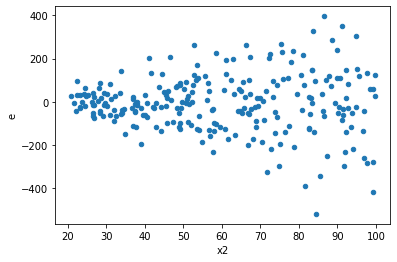

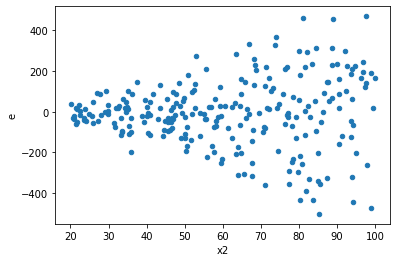

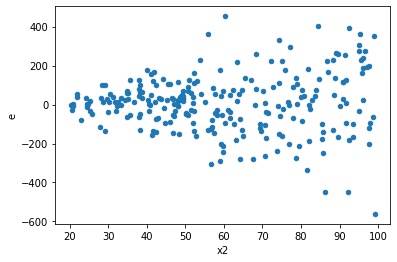

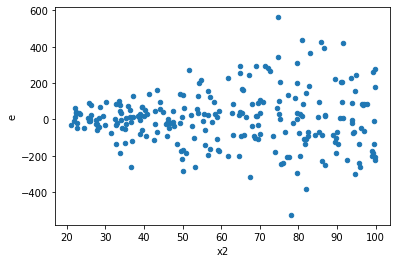

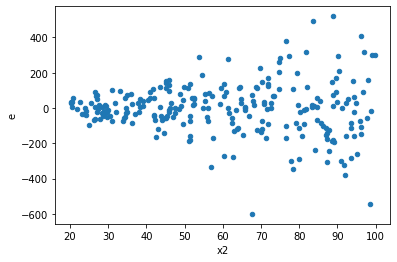

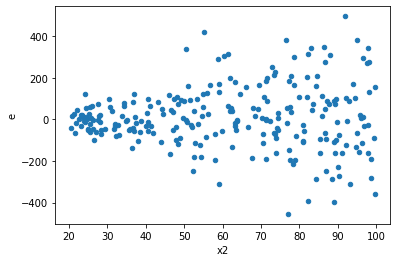

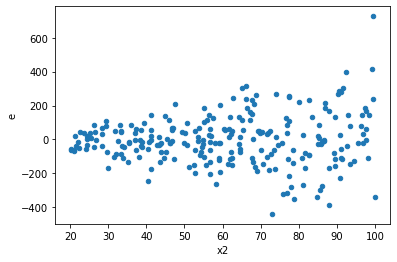

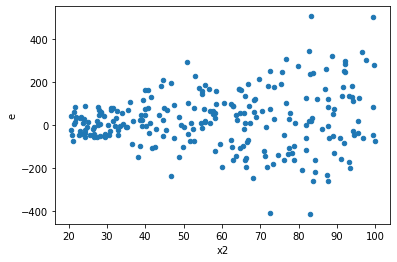

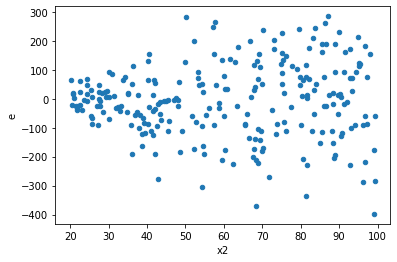

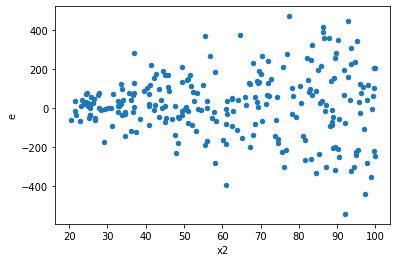

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,1360765.7447564027,2918034.312196036,14028.512832540233,30082.827960783874,2.144406062131148,0.0002129745515366821,0.9998935127242317,0.00010648727576834105,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1353304.8350570993,3715319.5267963414,13951.596237702055,38302.26316284888,2.745367806684577,1.1681797105200786e-06,0.9999994159101447,5.840898552600393e-07,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1163189.7120487073,3538291.6048697205,11991.646515966055,36477.233039894025,3.0418869494966425,9.675715162416054e-08,0.9999999516214242,4.837857581208027e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1501165.1661425743,2486008.792992603,15475.929547861591,25628.95662878972,1.6560528108846966,0.013710747090717845,0.9931446264546411,0.006855373545358923,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1134417.8185633866,2565963.525369884,11695.0290573545,26453.232220308084,2.261921034191256,7.636393701027089e-05,0.9999618180314949,3.8181968505135444e-05,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1389559.3100795909,2795443.762885698,14325.353712160731,28819.007864801013,2.0117484317568146,0.0006753273468473875,0.9996623363265763,0.00033766367342369374,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1618752.6892230983,2673406.276702426,16688.172053846374,27560.889450540475,1.6515223693530954,0.01422599695044191,0.992887001524779,0.007112998475220955,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,675034.1496995745,3787869.8052811855,6959.114945356438,39050.20417815655,5.611375079271154,1.1102230246251565e-15,0.9999999999999994,5.551115123125783e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1180431.9572885998,3026974.3605328337,12169.401621531957,31205.921242606535,2.564293809433676,5.5172231061551e-06,0.9999972413884469,2.75861155307755e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1360765.7447564027,2918034.312196036,14028.512832540233,30082.827960783874,2.144406062131148,0.0002129745515366821,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,1353304.8350570993,3715319.5267963414,13951.596237702055,38302.26316284888,2.745367806684577,1.1681797105200786e-06,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,1163189.7120487073,3538291.6048697205,11991.646515966055,36477.233039894025,3.0418869494966425,9.675715162416054e-08,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,1501165.1661425743,2486008.792992603,15475.929547861591,25628.95662878972,1.6560528108846966,0.013710747090717845,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,1134417.8185633866,2565963.525369884,11695.0290573545,26453.232220308084,2.261921034191256,7.636393701027089e-05,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,1389559.3100795909,2795443.762885698,14325.353712160731,28819.007864801013,2.0117484317568146,0.0006753273468473875,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,1618752.6892230983,2673406.276702426,16688.172053846374,27560.889450540475,1.6515223693530954,0.01422599695044191,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,675034.1496995745,3787869.8052811855,6959.114945356438,39050.20417815655,5.611375079271154,1.1102230246251565e-15,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,1180431.9572885998,3026974.3605328337,12169.401621531957,31205.921242606535,2.564293809433676,5.5172231061551e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    801
Reject005=1 : Homoscedasticity      199
Name: Result_test, dtype: int64